<a href="https://colab.research.google.com/github/Saichandu47/Data-Preprocessing-and-EDA-on-Bike-Buyers-1000-Dataset/blob/main/Task_1_Data_Cleaning_%26_EDA_of_Bike_buyers_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pattipatisaichandu","key":"8d0cd73bd381a7642b129f736f4a9f67"}'}

In [3]:
! mkdir ~/.kaggle


In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d heeraldedhia/bike-buyers

Dataset URL: https://www.kaggle.com/datasets/heeraldedhia/bike-buyers
License(s): GPL-2.0
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 39.9MB/s]


In [7]:
! unzip bike-buyers.zip

Archive:  bike-buyers.zip
  inflating: bike_buyers.csv         
  inflating: bike_buyers_clean.csv   


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**1.Data Inspection**

In [9]:
df=pd.read_csv('/content/bike_buyers.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [11]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


**2.Handling Missing Values**

In [12]:
df.isnull().sum()

,0
ID,0
Marital Status,7
Gender,11
Income,6
Children,8
Education,0
Occupation,0
Home Owner,4
Cars,9
Commute Distance,0


In [13]:
df.fillna({'Marital Status':df['Marital Status'].mode()[0]},inplace=True)
df.fillna({'Gender':df['Gender'].mode()[0]},inplace=True)
df.fillna({'Children':df['Children'].mode()[0]},inplace=True)
df.fillna({'Income':df['Income'].mean()},inplace=True)
df.fillna({'Home Owner':df['Home Owner'].mode()[0]},inplace=True)
df.fillna({'Cars':df['Cars'].mode()[0]},inplace=True)
df.fillna({'Age':df['Age'].mean()},inplace=True)


df.head()


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [14]:
df.isnull().sum()

,0
ID,0
Marital Status,0
Gender,0
Income,0
Children,0
Education,0
Occupation,0
Home Owner,0
Cars,0
Commute Distance,0


In [ ]:
df.dtypes

,0
ID,int64
Marital Status,object
Gender,object
Income,float64
Children,float64
Education,object
Occupation,object
Home Owner,object
Cars,float64
Commute Distance,object


**3.Univariate Analysis**

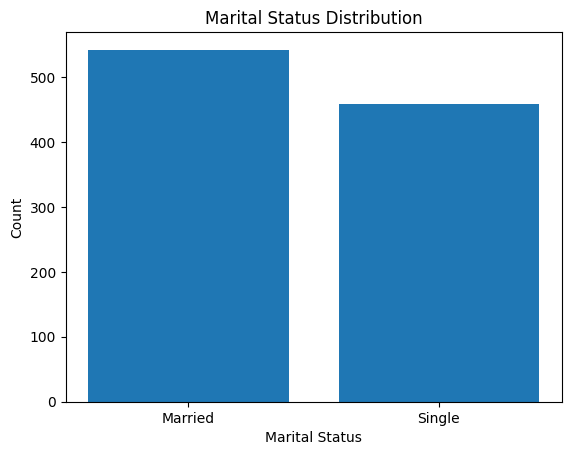

In [15]:
plt.hist(df['Marital Status'],bins=2,rwidth=0.8)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
xpos=np.arange(2)
plt.xticks(xpos+[0.25,-0.25],['Married','Single'])
plt.show()

 The chart indicates that a larger proportion of individuals in the dataset are married compared to those who are single.

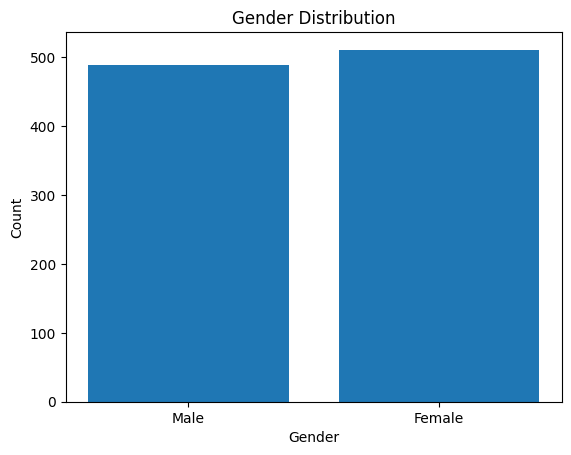

In [16]:
plt.hist(df['Gender'],bins=2,rwidth=0.8)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
xpos=np.arange(2)
plt.xticks(xpos+[0.25,-0.25],['Male','Female'])
plt.show()

The chart indicates a relatively balanced distribution of genders in the dataset, with a slight majority of females.

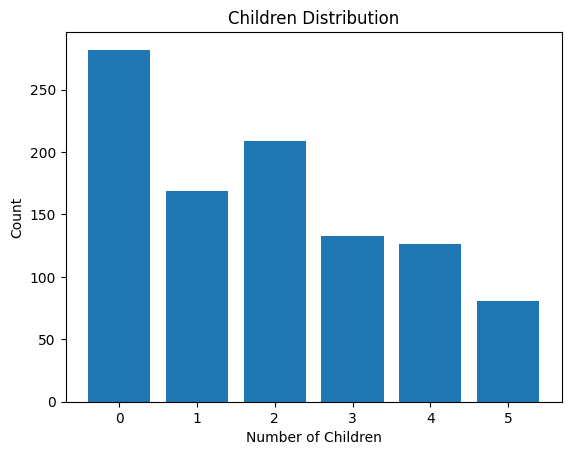

In [17]:
# Grouping data by 'Children' and counting the occurrences
grouped_data = df.groupby('Children').size()

# Plotting the bar plot
plt.bar(grouped_data.index, grouped_data.values)

plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Children Distribution')

plt.show()


From the chart, we can observe the following:

* **0 children:** The category "0 children" has the highest frequency, indicating that the majority of individuals in the dataset have no children.
* **1-2 children:** The categories "1 child" and "2 children" have moderate frequencies, suggesting that having one or two children is also common.
* **3-5 children:** The categories "3 children," "4 children," and "5 children" have decreasing frequencies, indicating that having more than two children is less common in the dataset.

Overall, the histogram suggests that the majority of individuals in the dataset have no children or a small number of children, with fewer individuals having larger families.


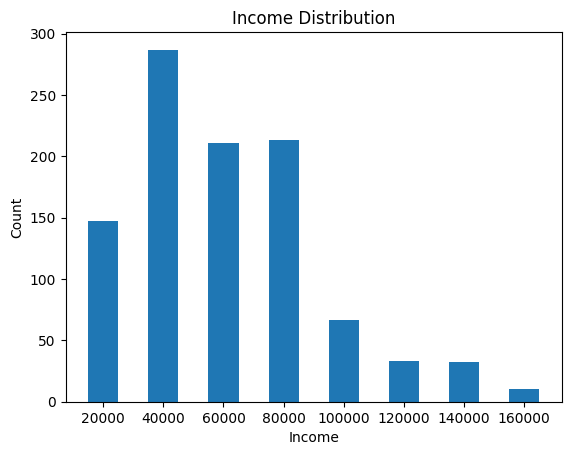

In [18]:
plt.hist(df['Income'],bins=8,rwidth=0.5)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution')
plt.show()


From the chart, we can observe the following:

* **Frequency:** The frequency of individuals decreases as the income level increases, indicating a right-skewed distribution.
* **Mode:** The most frequent income range appears to be between 40,000 and 60,000.

Overall, the histogram suggests that the majority of individuals in the dataset have lower incomes, with a smaller proportion of individuals earning higher incomes. This indicates a skewed distribution towards the lower end of the income spectrum.


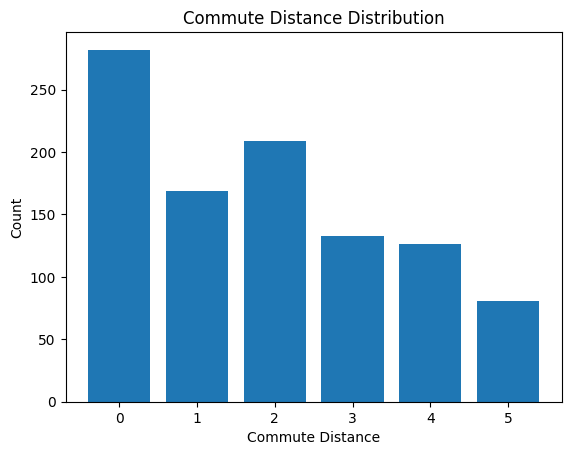

In [19]:
groped_data=df.groupby('Commute Distance').size()
plt.bar(grouped_data.index,grouped_data.values)
plt.xlabel('Commute Distance')
plt.ylabel('Count')
plt.title('Commute Distance Distribution')
plt.show()


From the chart, we can observe the following:

* **0 units:** The category "0 units" has the highest frequency, indicating that the majority of individuals commute a short distance or possibly work from home.
* **1-2 units:** The categories "1 unit" and "2 units" have moderate frequencies, suggesting that commuting distances of 1 and 2 units are also common.
* **3-5 units:** The categories "3 units," "4 units," and "5 units" have decreasing frequencies, indicating that longer commute distances are less common in the dataset.

Overall, the histogram suggests that most individuals in the dataset commute short distances, with fewer individuals commuting longer distances. This could indicate that the majority of people live relatively close to their workplaces or have flexible work arrangements.


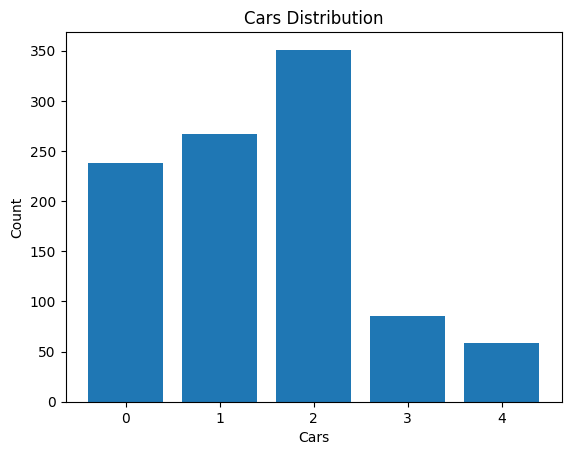

In [20]:
grouped_data=df.groupby('Cars').size()
plt.bar(grouped_data.index,grouped_data.values)
plt.xlabel('Cars')
plt.ylabel('Count')
plt.title('Cars Distribution')
plt.show()


From the chart, we can observe the following:

* **0 cars:** A significant number of individuals own 0 cars.
* **1-2 cars:** The categories "1 car" and "2 cars" have moderate frequencies, suggesting that owning one or two cars is common.
* **3-4 cars:** The categories "3 cars" and "4 cars" have lower frequencies, indicating that owning more than two cars is less common in the dataset.
* **Mode:** The mode (most frequent value) appears to be "2 cars," suggesting that owning two cars is the most common number of cars among individuals in the dataset.

Overall, the histogram suggests that the majority of individuals in the dataset own a small number of cars, with fewer individuals owning larger numbers of cars. This could indicate that factors such as affordability, lifestyle, and transportation needs influence car ownership patterns in the population.


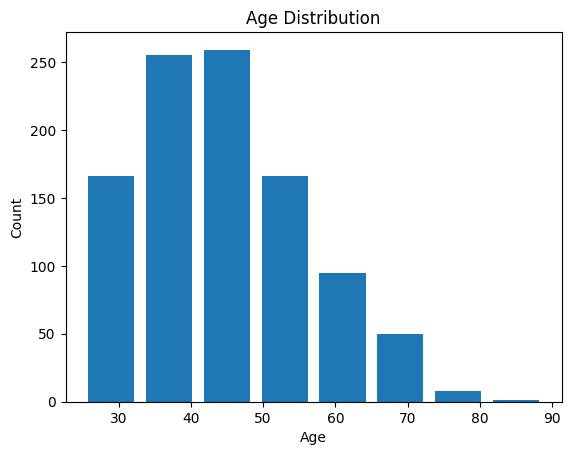

In [22]:
plt.hist(df['Age'],bins=8,rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


From the chart, we can observe the following:

* **Frequency:** The frequency of individuals decreases as the age increases, indicating a right-skewed distribution.
* **Mode:** The most frequent age group appears to be between 40 and 50.

Overall, the histogram suggests that the majority of individuals in the dataset are relatively young, with fewer individuals in the older age groups. This could indicate a population with a younger demographic.


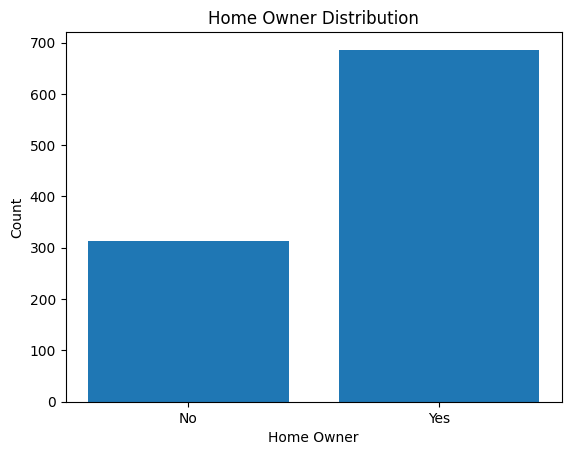

In [23]:
grouped_data=df.groupby('Home Owner').size()
plt.bar(grouped_data.index,grouped_data.values)
plt.xlabel('Home Owner')
plt.ylabel('Count')
plt.title('Home Owner Distribution')
plt.show()


The chart indicates that a large majority of individuals in the dataset are homeowners, while a smaller proportion are not. This suggests that home ownership is prevalent in the population represented by the data.


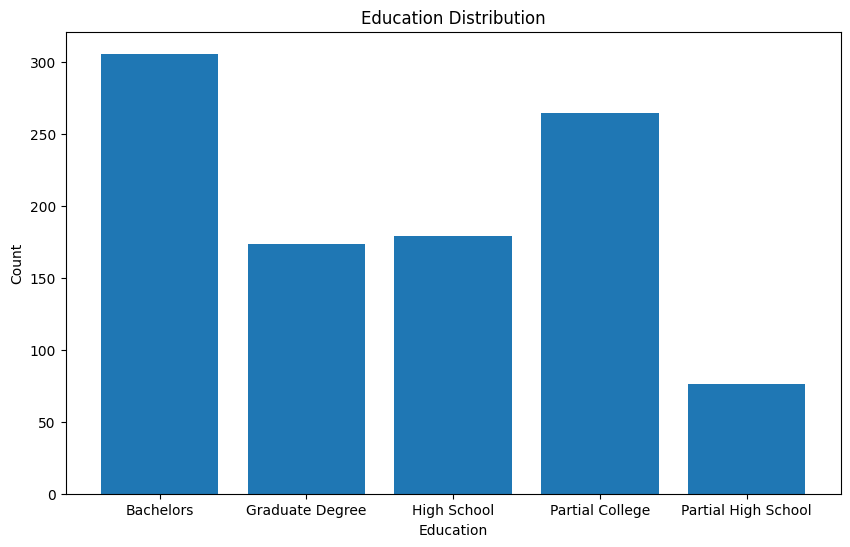

In [24]:
plt.figure(figsize=(10,6))

grouped_data=df.groupby('Education').size()
plt.bar(grouped_data.index,grouped_data.values)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()


From the chart, we can observe the following:

* **Bachelors:** The category "Bachelors" has the highest frequency, indicating that the majority of individuals in the dataset have a bachelor's degree.
* **Graduate Degree:** The category "Graduate Degree" has a moderate frequency, suggesting that a significant number of individuals have advanced degrees.
* **High School:** The category "High School" also has a moderate frequency, indicating that a considerable portion of the population has completed high school.
* **Partial College:** The category "Partial College" has a lower frequency compared to the previous categories, suggesting that fewer individuals have some college education but did not complete a degree.
* **Partial High School:** The category "Partial High School" has the lowest frequency, indicating that a small number of individuals have not completed high school.

Overall, the histogram suggests that the majority of individuals in the dataset have attained at least a high school education, with a significant number having bachelor's degrees and a smaller proportion having graduate degrees. This indicates a relatively well-educated population.


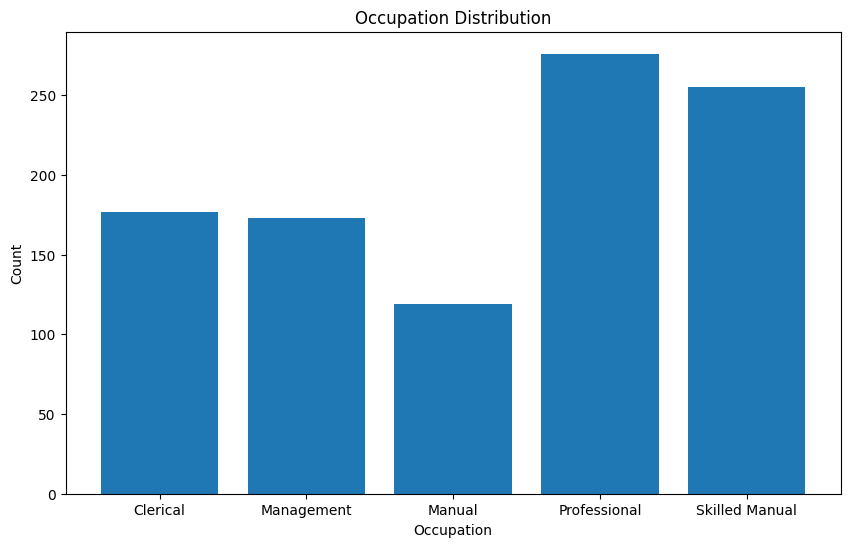

In [25]:
plt.figure(figsize=(10,6))
grouped_data=df.groupby('Occupation').size()
plt.bar(grouped_data.index,grouped_data.values)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution')
plt.show()


From the chart, we can observe the following:

* **Professional:** The category "Professional" has the highest frequency, indicating that the majority of individuals in the dataset are employed in professional occupations.
* **Clerical and Management:** The categories "Clerical" and "Management" have moderate frequencies, suggesting that a significant number of individuals work in these fields.
* **Manual and Skilled Manual:** The categories "Manual" and "Skilled Manual" have lower frequencies compared to the previous categories, indicating that fewer individuals are employed in manual labor or skilled manual occupations.

Overall, the chart suggests that the majority of individuals in the dataset are employed in professional occupations, with a smaller proportion working in clerical, management, manual, or skilled manual roles.


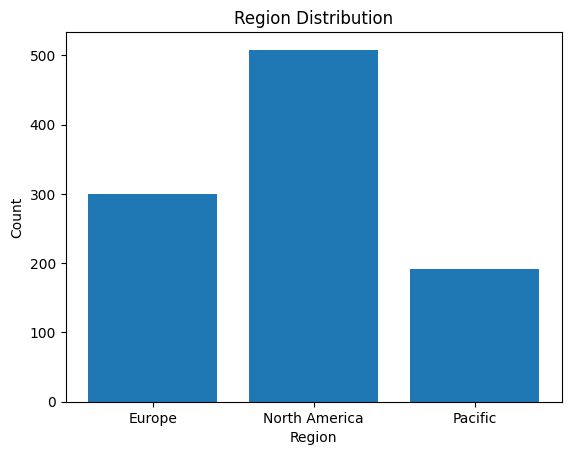

In [26]:
grouped_data=df.groupby('Region').size()
plt.bar(grouped_data.index,grouped_data.values)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.show()


From the chart, we can observe the following:

* **North America:** The category "North America" has the highest frequency, indicating that the majority of individuals or data points in the dataset are from this region.
* **Europe:** The category "Europe" has a moderate frequency, suggesting that a significant number of individuals or data points are from Europe.
* **Pacific:** The category "Pacific" has the lowest frequency compared to the other two categories, indicating that fewer individuals or data points are from the Pacific region.

Overall, the histogram suggests that the dataset is skewed towards North America, with a smaller proportion of individuals or data points from Europe and an even smaller proportion from the Pacific region.


**4.Bivariate Analysis**

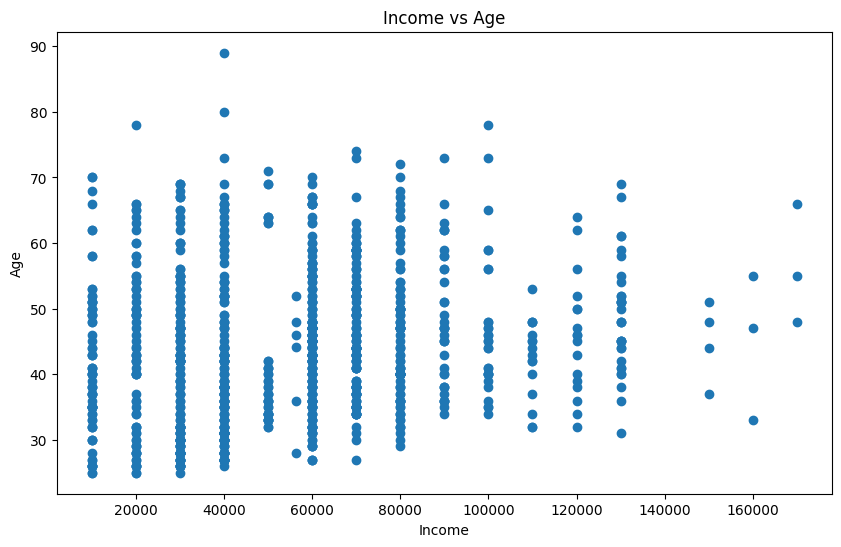

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(df['Income'],df['Age'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Income vs Age')
plt.show()


From the plot, we can observe the following:

* **No clear linear relationship:** There doesn't seem to be a strong linear relationship between income and age. The points are scattered, indicating that income is not directly proportional to age.
* **Clustering:** There are some clusters of points visible in the plot, suggesting that certain age groups might have a higher concentration of individuals within specific income ranges.
* **Outliers:** A few individual points might be considered outliers, as they are far from the main cluster of points. These could represent individuals with unusual combinations of age and income.

Overall, the scatter plot suggests a complex relationship between income and age, with no clear linear correlation.


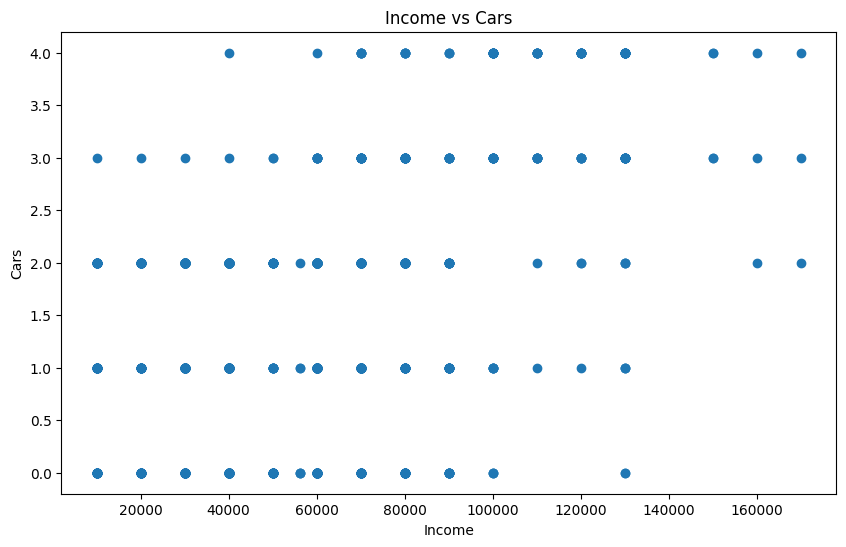

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df['Income'],df['Cars'])
plt.xlabel('Income')
plt.ylabel('Cars')
plt.title('Income vs Cars')
plt.show()


From the plot, we can observe the following:

* **No clear linear relationship:** There doesn't seem to be a strong linear relationship between income and the number of cars. The points are scattered, indicating that the number of cars is not directly proportional to income.
* **Horizontal Bands:** The data points appear to be clustered in horizontal bands, suggesting that certain income levels are associated with specific ranges of car ownership. For example, there might be a concentration of individuals with 2 or 3 cars within a particular income range.
* **Outliers:** A few individual points might be considered outliers, as they are far from the main clusters. These could represent individuals with unusual combinations of income and car ownership.

Overall, the scatter plot suggests a complex relationship between income and the number of cars, with no clear linear correlation.


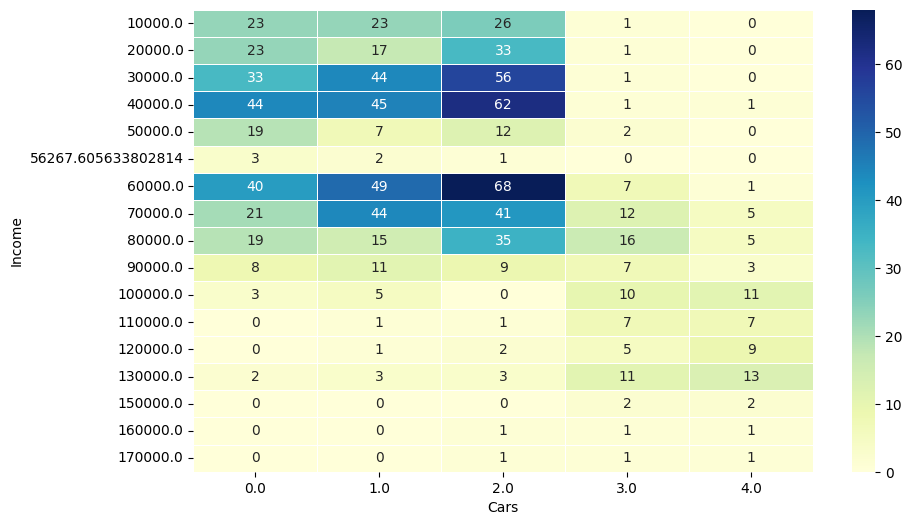

In [29]:
heatmap_data=pd.pivot_table(df,values='ID',index='Income',columns='Cars',aggfunc='count',fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5, fmt="d")
plt.show()


From the heatmap, we can observe the following:

* **Concentration:** The highest frequency of individuals is concentrated in the lower income ranges with 0 to 2 cars. This suggests that a large portion of the population owns fewer cars, especially those with lower incomes.
* **Decreasing Frequency:** As income increases, the frequency of individuals owning more cars generally decreases. This indicates that while there is a positive correlation between income and car ownership, it's not a perfectly linear relationship.
* **Outliers:** A few individual points might be considered outliers, as they have a higher frequency compared to neighboring cells. These could represent specific combinations of income and car ownership that are less common in the dataset.

Overall, the heatmap provides a visual representation of the relationship between income and car ownership, highlighting the concentration of individuals in certain income and car ownership categories. It also reveals the general trend of increasing car ownership with higher income levels, while acknowledging the existence of outliers and the complexity of the relationship.


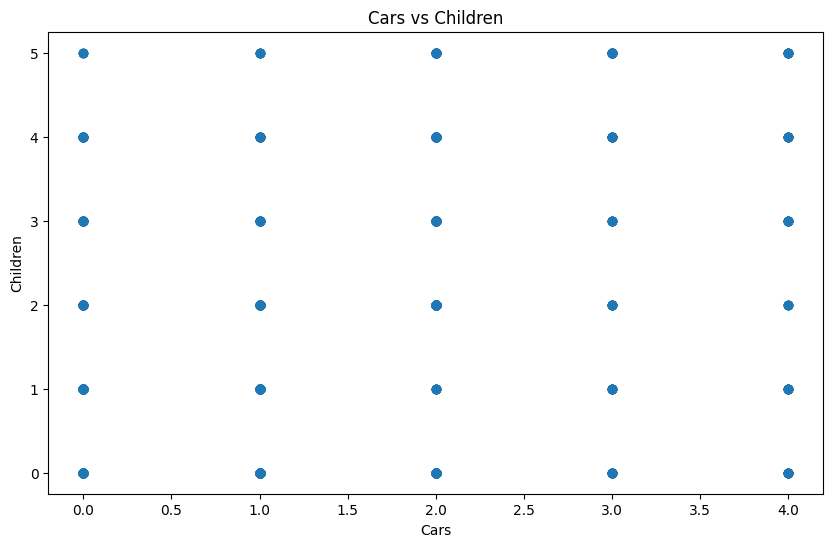

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(df['Cars'],df['Children'])
plt.xlabel('Cars')
plt.ylabel('Children')
plt.title('Cars vs Children')
plt.show()


From the plot, we can observe the following:

* **No clear linear relationship:** There doesn't seem to be a strong linear relationship between the number of cars and the number of children. The points are scattered, indicating that the number of cars is not directly proportional to the number of children.
* **Clustering:** There are some clusters of points visible in the plot, suggesting that certain combinations of cars and children might be more common. For example, there might be a concentration of families with 2 cars and 2 children.
* **Outliers:** A few individual points might be considered outliers, as they are far from the main clusters. These could represent families with unusual combinations of cars and children.

Overall, the scatter plot suggests a complex relationship between the number of cars and the number of children, with no clear linear correlation.

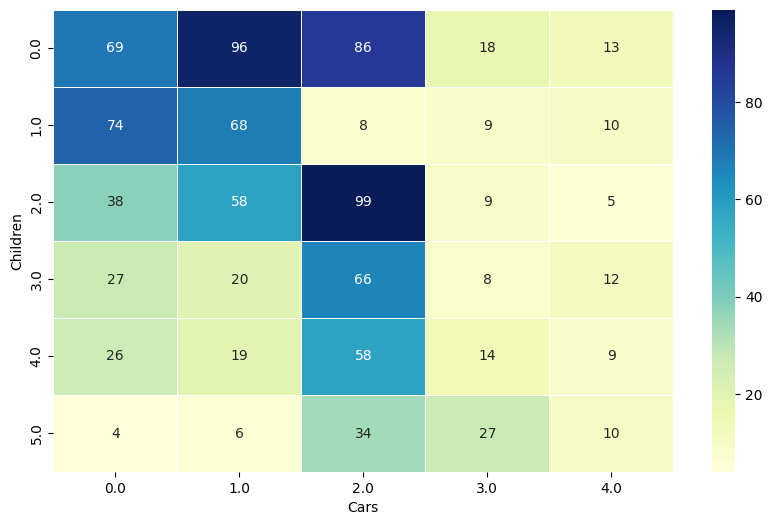

In [31]:
heatmap_data=pd.pivot_table(df,values='ID',index='Children',columns='Cars',aggfunc='count',fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5, fmt="d")
plt.show()


From the heatmap, we can observe the following:

* **Concentration:** The highest frequency of individuals is concentrated in the cells with 0 to 2 cars and 0 to 2 children. This suggests that a large portion of the population has small families and owns fewer cars.
* **Decreasing Frequency:** As the number of cars or children increases, the frequency of individuals generally decreases. This indicates that having more cars or children is less common in the dataset.
* **Outliers:** A few individual points might be considered outliers, as they have a higher frequency compared to neighboring cells. These could represent specific combinations of cars and children that are less common in the population.

Overall, the heatmap provides a visual representation of the relationship between the number of cars and the number of children, highlighting the concentration of individuals in certain categories. It also reveals the general trend of decreasing frequency as the number of cars or children increases, while acknowledging the existence of outliers and the complexity of the relationship.


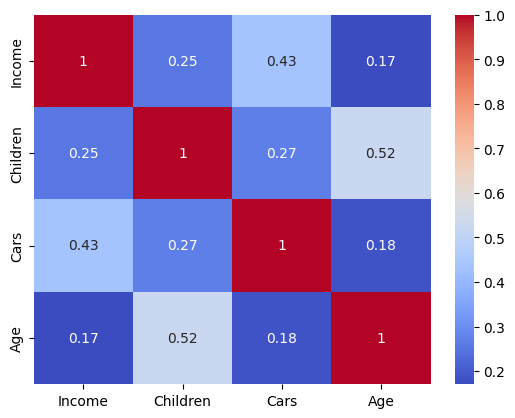

In [32]:
# Correlation matrix and heatmap
correlation = df[['Income', 'Children', 'Cars', 'Age']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

plt.show()


From the heatmap, we can observe the following:

* **Positive Correlations:**
    * Income and Cars: There is a strong positive correlation between income and the number of cars. This suggests that as income increases, the number of cars owned tends to increase as well.
    * Children and Age: There is a moderate positive correlation between the number of children and age. This indicates that older individuals are more likely to have children.

* **Negative Correlation:**
    * Income and Age: There is a weak negative correlation between income and age. This suggests that while there might be a slight tendency for younger individuals to have higher incomes, the relationship is not very strong.

* **Weak Correlations:**
    * Cars and Children: The correlation between cars and children is weak, suggesting that there is little or no relationship between these two variables.

Overall, the heatmap provides a visual summary of the relationships between the variables in the dataset. It highlights the strong positive correlation between income and cars, the moderate positive correlation between children and age, and the weak or no correlation between other variables.


In [35]:
pl=px.histogram(df,x='Income',color='Gender',title='Income Distribution by Gender')
pl.show()


From the chart, we can observe the following:

* **Overall Distribution:** The income distribution is skewed to the right, meaning there are more individuals in the lower income ranges compared to the higher ones.
* **Gender Differences:** There are some differences in the income distribution between males and females:
    * **Lower Income Ranges:** In the lower income ranges, males and females have a relatively similar distribution.
    * **Mid-Income Ranges:** In the middle income ranges, there seems to be a slight increase in the proportion of females compared to males.
    * **Higher Income Ranges:** In the higher income ranges, the proportion of males appears to be slightly higher than females.

Overall, the chart suggests that while there are some differences in income distribution between genders, the overall trend is similar for both males and females, with a majority of individuals falling into the lower income ranges.


In [43]:
pl=px.histogram(df,x='Children',color='Marital Status',title='Children by Marital Status')
pl.show()


From the chart, we can observe the following:

* **Overall Distribution:** The distribution of individuals across the number of children is similar for both married and single individuals.
* **Married Individuals:** Married individuals have a higher count in the lower number of children categories (0-2 children) compared to single individuals.
* **Single Individuals:** Single individuals have a higher count in the higher number of children categories (3-5 children) compared to married individuals.

Overall, the chart suggests that while both married and single individuals have a similar distribution of children, married individuals are more likely to have fewer children, while single individuals are more likely to have a higher number of children.


In [37]:
pl=px.histogram(df,x='Income',color='Education',title='Income Distribution by Education')
pl.show()


From the chart, we can observe the following:

* **Overall Distribution:** The income distribution is skewed to the right, meaning there are more individuals in the lower income ranges compared to the higher ones.
* **Education Level:** Individuals with higher education levels generally have higher incomes compared to those with lower education levels. For example, individuals with graduate degrees tend to have higher incomes than those with only a high school education.
* **Interactions:** There might be interactions between marital status and education level in influencing income. For instance, married individuals with higher education levels might be more likely to have higher incomes compared to single individuals with the same education level.

Overall, the chart suggests that both marital status and education level play a role in determining income. Individuals with higher education levels and who are married tend to have higher incomes compared to those with lower education levels and who are single. However, there are also individual variations and other factors that influence income.


In [38]:
pl=px.histogram(df,x='Income',color='Occupation',title='Income Distribution by Occupation')
pl.show()


From the chart, we can observe the following:

* **Occupation:** There are differences in the income distribution among different occupations:
    * **Professional:** Individuals in professional occupations tend to have higher incomes compared to other occupations, with a significant portion falling into the higher income ranges.
    * **Clerical and Skilled Manual:** Individuals in clerical and skilled manual occupations have a more spread-out income distribution, with some individuals in the lower income ranges and others in the higher income ranges.
    * **Manual:** Individuals in manual occupations tend to have lower incomes compared to other occupations, with a majority falling into the lower income ranges.
    * **Management:** Individuals in management occupations have a relatively high proportion in the higher income ranges, but there is also a significant portion in the lower income ranges.

Overall, the chart suggests that occupation plays a significant role in determining income. Individuals in professional occupations tend to have higher incomes compared to those in other occupations, while individuals in manual occupations tend to have lower incomes. However, there are also individual variations and other factors that influence income within each occupation.


In [39]:
pl=px.histogram(df,x='Income',color='Home Owner',title='Income Distribution by Home Owner')
pl.show()


From the chart, we can observe the following:

* **Home Owner:** Homeowners tend to have higher incomes compared to non-homeowners, especially in the higher income ranges.
* **Non-Home Owners:** Non-homeowners are more concentrated in the lower income ranges, with a smaller proportion in the higher income ranges.

Overall, the chart suggests that home ownership is associated with higher income levels. However, there are also individual variations and other factors that influence income, even among homeowners and non-homeowners.


In [40]:
pl=px.histogram(df,x='Income',color='Commute Distance',title='Income Distribution by Commute Distance')
pl.show()


From the chart, we can observe the following:

* **Commute Distance:** There are differences in the income distribution among individuals with different commute distances:
    * **0-1 Miles:** Individuals who commute 0-1 miles have a relatively high proportion in the lower income ranges.
    * **2-5 Miles:** Individuals who commute 2-5 miles have a more spread-out income distribution, with some in the lower income ranges and others in the higher income ranges.
    * **5-10 Miles:** Individuals who commute 5-10 miles tend to have higher incomes compared to those who commute shorter distances.
    * **1-2 Miles:** Individuals who commute 1-2 miles have a similar income distribution to those who commute 2-5 miles.
    * **10+ Miles:** Individuals who commute 10+ miles have a relatively high proportion in the higher income ranges.

Overall, the chart suggests that commute distance is associated with income. Individuals who commute longer distances tend to have higher incomes compared to those who commute shorter distances. However, there are also individual variations and other factors that influence income within each commute distance range.


In [41]:
pl=px.histogram(df,x='Income',color='Region',title='Income Distribution by Region')
pl.show()


From the chart, we can observe the following:

* **Regional Differences:** There are differences in the income distribution among the regions:
    * **North America:** North America has the highest proportion of individuals in the higher income ranges, suggesting a higher concentration of individuals with higher incomes.
    * **Europe:** Europe has a more spread-out income distribution, with individuals present in all income ranges.
    * **Pacific:** The Pacific region has a relatively high proportion of individuals in the lower income ranges.

Overall, the chart suggests that income levels vary across regions. North America has a higher concentration of individuals in the higher income ranges, while the Pacific region has a higher concentration in the lower income ranges. Europe has a more balanced income distribution.


In [42]:
pl=px.histogram(df,x='Cars',color='Commute Distance',title='Cars Distribution by Commute Distance')
pl.show()


From the chart, we can observe the following:

* **Commute Distance:** There are some differences in the distribution of cars based on commute distance:
    * **0-1 Miles:** Individuals who commute 0-1 miles have a slightly higher proportion of owning 0-1 cars compared to other commute distances.
    * **2-5 Miles:** Individuals who commute 2-5 miles have a slightly higher proportion of owning 2-3 cars compared to other commute distances.
    * **5-10 Miles:** Individuals who commute 5-10 miles have a slightly higher proportion of owning 3-4 cars compared to other commute distances.
    * **1-2 Miles:** Individuals who commute 1-2 miles have a similar distribution of cars compared to those who commute 2-5 miles.
    * **10+ Miles:** Individuals who commute 10+ miles have a slightly higher proportion of owning 0-1 cars compared to other commute distances.

Overall, the chart suggests that while there are some minor differences in car ownership based on commute distance, the overall distribution is relatively similar across all ranges. This could indicate that factors other than commute distance, such as income, family size, and personal preferences, play a more significant role in determining car ownership.


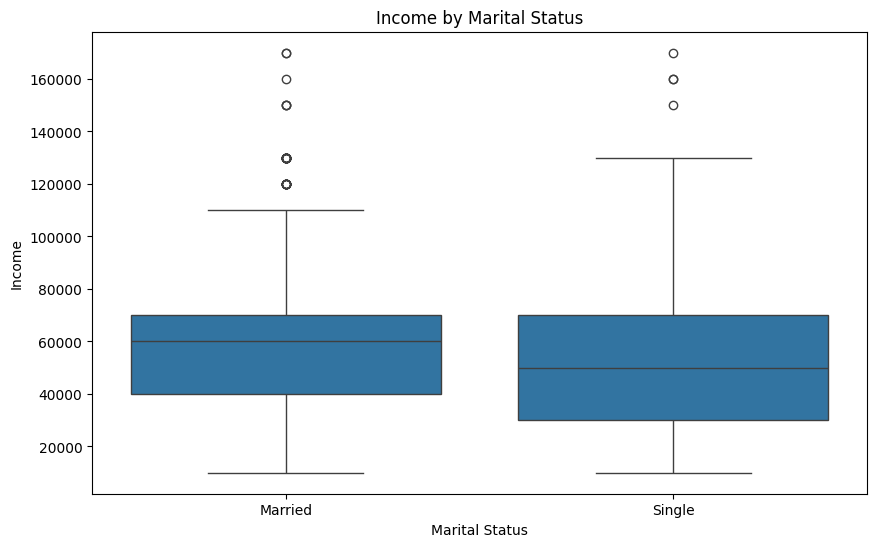

In [44]:
# Boxplot: Income by Marital Status
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital Status', y='Income', data=df)
plt.title('Income by Marital Status')
plt.show()
warnings.filterwarnings('ignore')


From the plot, we can observe the following:

* **Median Income:** The median income for married individuals appears to be slightly higher than that of single individuals.
* **Income Spread:** The interquartile range (IQR) for both groups seems comparable, suggesting a similar spread of income levels within each group.
* **Outliers:** There are a few outliers in the "Single" group, indicating some individuals with very high incomes.

Overall, the box plot suggests that while there might be a slight difference in median income between married and single individuals, the overall income distribution is relatively similar within each group. The presence of outliers in the "Single" group indicates that there are some individuals with exceptionally high incomes.


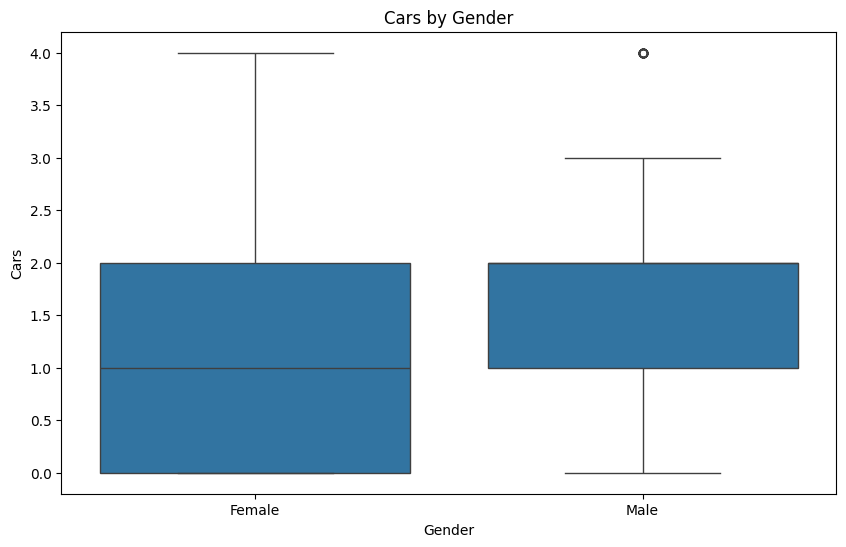

In [45]:
# Boxplot: Cars by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Cars', data=df)
plt.title('Cars by Gender')
plt.show()



From the plot, we can observe the following:

* **Median Cars:** The median number of cars owned by both females and males appears to be around 2.
* **Income Spread:** The interquartile range (IQR) for both groups seems comparable, suggesting a similar spread in the number of cars owned within each gender.
* **Outliers:** There is one outlier in the "Male" group, indicating an individual who owns a significantly higher number of cars compared to others.

Overall, the box plot suggests that there is no significant difference in the number of cars owned by females and males. Both groups have a similar median and spread of car ownership, with the exception of the outlier in the "Male" group.


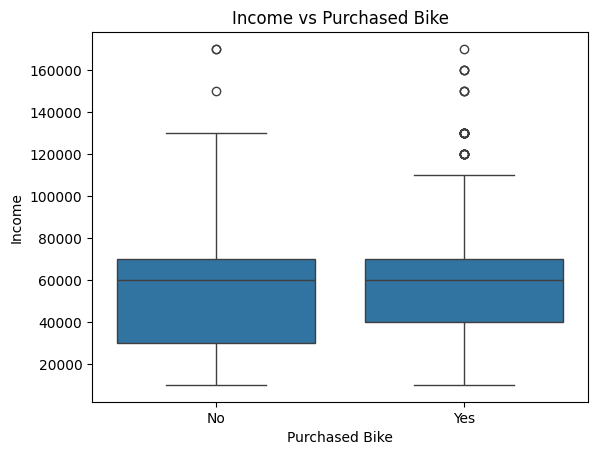

In [ ]:
# Boxplot: Income vs Purchased Bike
sns.boxplot(x='Purchased Bike', y='Income', data=df)
plt.title('Income vs Purchased Bike')
plt.show()


From the plot, we can observe the following:

* **Median Income:** The median income for individuals who purchased bikes appears slightly higher than those who didn't.
* **Income Spread:** The interquartile range (IQR) for both groups seems comparable, suggesting a similar spread of income levels within each group.
* **Outliers:** There are a few outliers in the "No" group (those who didn't purchase bikes), indicating some individuals with very high incomes who didn't buy bikes.

Overall, the box plot suggests that while there might be a slight difference in median income between those who purchased bikes and those who didn't, the overall income distribution is relatively similar within each group. The presence of outliers in the "No" group indicates that there are some individuals with exceptionally high incomes who didn't buy bikes.


**Comparing Every Other Column with Purchased Bike**

In [46]:
plt=px.histogram(df,x='Gender',color='Purchased Bike',title='Gender Distribution by Purchased Bike')
plt.show()


From the chart, we can observe the following:

* **Female:** A higher proportion of females purchased bikes compared to males.
* **Male:** A higher proportion of males did not purchase bikes compared to females.

Overall, the chart suggests that there is a difference in bike purchase behavior between genders, with females being more likely to purchase bikes than males in this dataset.


In [ ]:
plt=px.histogram(df,x='Income',color='Purchased Bike',title='Income Distribution by Purchased Bike')
plt.show()


From the chart, we can observe the following:

* **Purchased Bike:** There are some differences in the income distribution between those who purchased bikes and those who didn't:
    * **Lower Income Ranges:** A higher proportion of individuals who purchased bikes fall into the lower income ranges compared to those who didn't.
    * **Higher Income Ranges:** A higher proportion of individuals who didn't purchase bikes fall into the higher income ranges.

Overall, the chart suggests that while both groups have a similar overall income distribution, there is a tendency for individuals in the lower income ranges to be more likely to purchase bikes.


In [ ]:
plt=px.histogram(df,x='Education',color='Purchased Bike',title='Education Distribution by Purchased Bike')
plt.show()


From the chart, we can observe the following:

* **Purchased Bike:** There are some differences in the distribution of education levels between the two groups:
    * **Bachelors and Graduate Degree:** Individuals with a Bachelor's or Graduate Degree are more likely to purchase bikes compared to those with lower education levels.
    * **Partial College and High School:** Individuals with Partial College or High School education are less likely to purchase bikes compared to those with higher education levels.
    * **Partial High School:** Individuals with Partial High School education have the lowest likelihood of purchasing bikes.

Overall, the chart suggests that education level plays a role in bike purchases. Individuals with higher education levels are more likely to purchase bikes compared to those with lower education levels.


In [ ]:
plt=px.histogram(df,x='Occupation',color='Purchased Bike',title='Occupation Distribution by Purchased Bike')
plt.show()


From the chart, we can observe the following:

* **Purchased Bike:** There are some differences in the distribution of occupations between the two groups:
    * **Professional:** A higher proportion of individuals in professional occupations purchased bikes compared to other occupations.
    * **Clerical and Skilled Manual:** Individuals in clerical and skilled manual occupations have a similar likelihood of purchasing bikes compared to the overall average.
    * **Manual and Management:** Individuals in manual and management occupations are less likely to purchase bikes compared to the overall average.

Overall, the chart suggests that occupation plays a role in bike purchases. Individuals in professional occupations are more likely to purchase bikes, while individuals in manual and management occupations are less likely to purchase bikes.


In [ ]:
plt=px.histogram(df,x='Commute Distance',color='Purchased Bike',title='Commute Distance Distribution by Purchased Bike')
plt.show()


From the chart, we can observe the following:

* **Purchased Bike:** There are some differences in the distribution of commute distances between the two groups:
    * **0-1 Miles:** Individuals who commute 0-1 miles are more likely to purchase bikes compared to those who commute longer distances.
    * **2-5 Miles:** Individuals who commute 2-5 miles have a similar likelihood of purchasing bikes compared to the overall average.
    * **5-10 Miles:** Individuals who commute 5-10 miles are less likely to purchase bikes compared to the overall average.
    * **1-2 Miles:** Individuals who commute 1-2 miles have a similar likelihood of purchasing bikes compared to those who commute 2-5 miles.
    * **10+ Miles:** Individuals who commute 10+ miles are the least likely to purchase bikes.

Overall, the chart suggests that commute distance plays a role in bike purchases. Individuals who commute shorter distances, especially 0-1 miles, are more likely to purchase bikes compared to those who commute longer distances.


In [ ]:
plt=px.histogram(df,x='Age',color='Purchased Bike',title='Age Distribution by Purchased Bike')
plt.show()


From the histogram, we can observe the following:

* **Purchased Bike:** There are some differences in the age distribution between the two groups:
    * **Younger Ages:** A higher proportion of younger individuals (30-40) purchased bikes compared to older individuals.
    * **Older Ages:** A higher proportion of older individuals (60+) did not purchase bikes compared to younger individuals.

Overall, the histogram suggests that while age is not a strong predictor of bike purchases, younger individuals are slightly more likely to purchase bikes compared to older individuals.


In [ ]:
plt=px.histogram(df,x='Region',color='Purchased Bike',title='Region Distribution by Purchased Bike')
plt.show()


From the chart, we can observe the following:

* **Purchased Bike:** There are some differences in the distribution of regions between the two groups:
    * **North America:** A higher proportion of individuals in North America purchased bikes compared to other regions.
    * **Europe and Pacific:** Individuals in Europe and the Pacific have a similar likelihood of purchasing bikes compared to the overall average.

Overall, the chart suggests that region plays a role in bike purchases. Individuals in North America are more likely to purchase bikes compared to those in Europe and the Pacific.


**Multivariate Analysis**

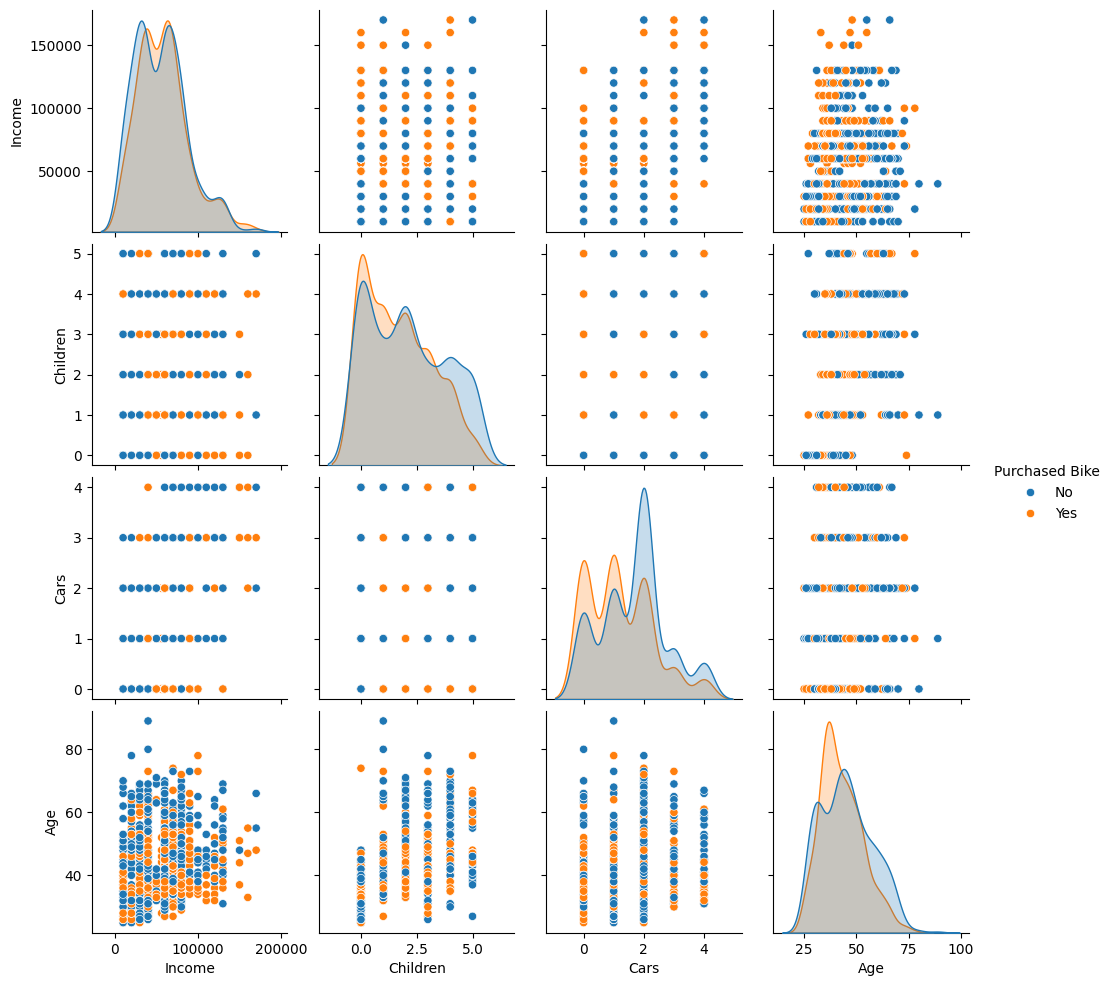

In [ ]:

sns.pairplot(df[['Income', 'Children', 'Cars', 'Age', 'Purchased Bike']], hue='Purchased Bike')



**Income and Bike Purchases:**

* **Positive Correlation:** There seems to be a positive correlation between income and bike purchases. As income increases, the likelihood of purchasing a bike also tends to increase.
* **Distribution:** The distribution of income for bike purchasers is slightly skewed towards higher income levels compared to non-purchasers.

**Children and Bike Purchases:**

* **Negative Correlation:** There might be a weak negative correlation between the number of children and bike purchases. This could suggest that families with more children might prioritize other expenses over bike purchases.
* **Distribution:** The distribution of children for bike purchasers appears slightly skewed towards lower numbers compared to non-purchasers.

**Cars and Bike Purchases:**

* **No Strong Correlation:** There doesn't seem to be a strong correlation between the number of cars and bike purchases. This indicates that car ownership doesn't significantly influence bike ownership.
* **Distribution:** The distributions of cars for both groups appear relatively similar.

**Age and Bike Purchases:**

* **Positive Correlation:** There appears to be a positive correlation between age and bike purchases. Older individuals might be more likely to purchase bikes for leisure or exercise.
* **Distribution:** The distribution of age for bike purchasers is slightly skewed towards older age groups compared to non-purchasers.

**Additional Observations:**

* **Outliers:** There are a few outliers in the income and age distributions, particularly for non-purchasers. These might represent individuals with extreme values that could influence the overall analysis.
* **Interactions:** The pair plot suggests potential interactions between factors. For example, the relationship between income and bike purchases might be influenced by the number of children.

**Overall, the pair plot provides valuable insights into the factors influencing bike purchases.** It suggests that income and age are positively correlated with bike ownership, while the number of children might have a negative impact. However, the relationships between these factors are complex and can be influenced by other factors not included in this analysis.


**Outlier Detection**

<Axes: ylabel='Income'>

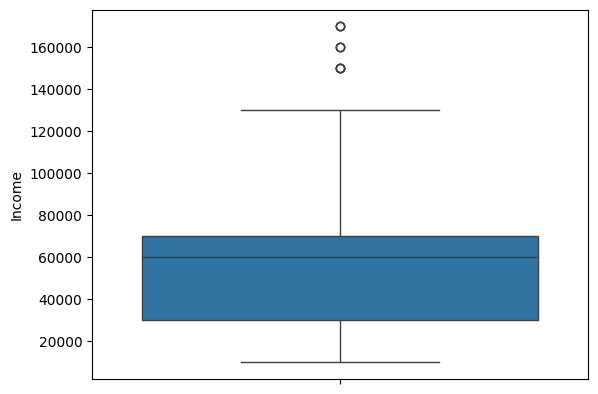

In [ ]:
sns.boxplot(data=df, y='Income')



From the plot, we can observe the following:

* **Median Income:** The horizontal line inside the box represents the median income, which appears to be around 65,000.
* **Interquartile Range (IQR):** The box itself represents the IQR, which is the range between the 25th and 75th percentiles of the data. The IQR seems to be around 40,000 to 100,000, indicating a moderate spread of income levels.
* **Whiskers:** The lines extending from the boxes are the whiskers, which typically show the minimum and maximum values excluding outliers. The whiskers extend from around 20,000 to 130,000.
* **Outliers:** There are three outliers visible in the plot, represented by the individual points above the upper whisker. These indicate individuals with exceptionally high incomes.

Overall, the box plot suggests that the majority of individuals in the dataset have incomes within the range of 40,000 to 100,000, with a median income of around 65,000. There are a few outliers with significantly higher incomes.


<Axes: ylabel='Cars'>

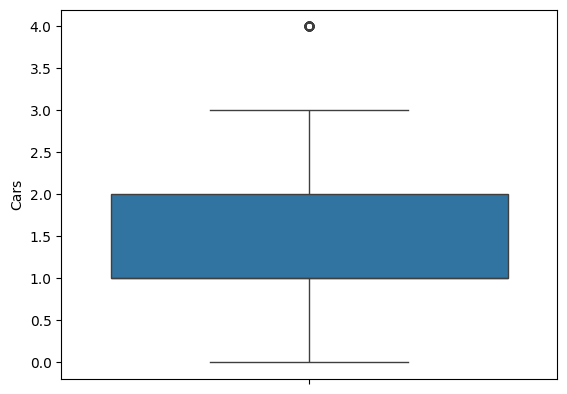

In [ ]:
sns.boxplot(data=df, y='Cars')


From the plot, we can observe the following:

* **Median Cars:** The horizontal line inside the box represents the median number of cars, which appears to be around 2.
* **Interquartile Range (IQR):** The box itself represents the IQR, which is the range between the 25th and 75th percentiles of the data. The IQR seems to be from 1 to 3, indicating a moderate spread in the number of cars owned.
* **Whiskers:** The lines extending from the boxes are the whiskers, which typically show the minimum and maximum values excluding outliers. The whiskers extend from 0 to 3.
* **Outliers:** There is one outlier visible in the plot, represented by the individual point above the upper whisker. This indicates an individual who owns a significantly higher number of cars compared to others.

Overall, the box plot suggests that the majority of individuals in the dataset own 1-2 cars, with a median of 2 cars. There is a moderate spread in the number of cars owned, with one outlier indicating an individual with a significantly higher number of cars.


<Axes: ylabel='Age'>

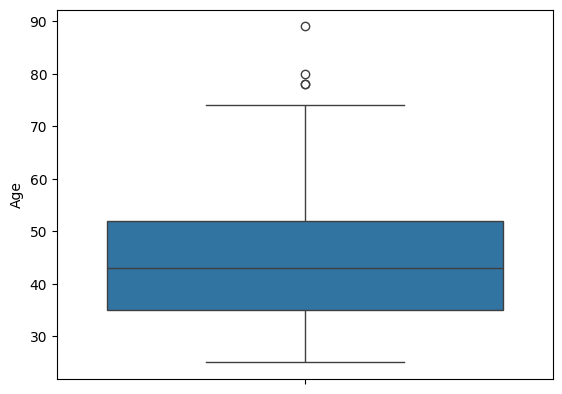

In [ ]:
sns.boxplot(data=df, y='Age')


From the plot, we can observe the following:

* **Median Age:** The horizontal line inside the box represents the median age, which appears to be around 45.
* **Interquartile Range (IQR):** The box itself represents the IQR, which is the range between the 25th and 75th percentiles of the data. The IQR seems to be from 30 to 60, indicating a moderate spread of ages.
* **Whiskers:** The lines extending from the boxes are the whiskers, which typically show the minimum and maximum values excluding outliers. The whiskers extend from around 25 to 75.
* **Outliers:** There are two outliers visible in the plot, represented by the individual points above the upper whisker. These indicate individuals with significantly higher ages compared to the rest of the dataset.

Overall, the box plot suggests that the majority of individuals in the dataset are between 30 and 60 years old, with a median age of around 45. There are a few outliers with significantly higher ages.


<Axes: ylabel='Children'>

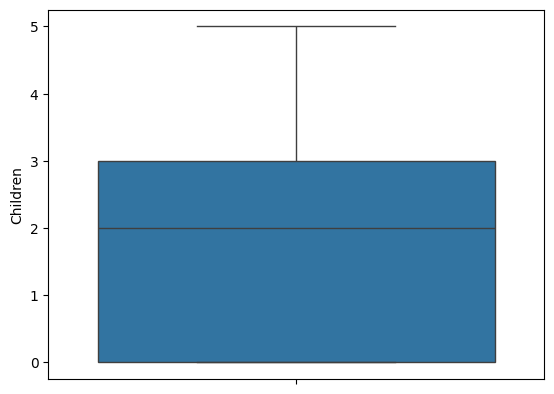

In [ ]:
sns.boxplot(data=df, y='Children')


From the plot, we can observe the following:

* **Median Children:** The horizontal line inside the box represents the median number of children, which appears to be around 2.
* **Interquartile Range (IQR):** The box itself represents the IQR, which is the range between the 25th and 75th percentiles of the data. The IQR seems to be from 1 to 3, indicating a moderate spread in the number of children.
* **Whiskers:** The lines extending from the boxes are the whiskers, which typically show the minimum and maximum values excluding outliers. The whiskers extend from 0 to 5.
* **Outliers:** There is one outlier visible in the plot, represented by the individual point above the upper whisker. This indicates a family with a significantly higher number of children compared to others.

Overall, the box plot suggests that the majority of families in the dataset have 1-2 children, with a median of 2 children. There is a moderate spread in the number of children, with one outlier indicating a family with a significantly higher number of children.


In [ ]:
from scipy.stats import skew

# Checking skewness for numerical columns
for col in ['Income', 'Children', 'Cars', 'Age']:
    print(f'{col} skewness: {skew(df[col])}')

Income skewness: 0.7522977046652561
Children skewness: 0.4027891116856636
Cars skewness: 0.405683706150945
Age skewness: 0.5247080731191376


In [ ]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


**Encoding Categorical Variables**

In [47]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
encoded_edu=pd.DataFrame(ohe.fit_transform(df[['Education']]).toarray(),columns=ohe.get_feature_names_out(['Education']))
df=pd.concat([df,encoded_edu],axis=1)

encoded_Occupation=pd.DataFrame(ohe.fit_transform(df[['Occupation']]).toarray(),columns=ohe.get_feature_names_out(['Occupation']))
df=pd.concat([df,encoded_Occupation],axis=1)

encoded_Region=pd.DataFrame(ohe.fit_transform(df[['Region']]).toarray(),columns=ohe.get_feature_names_out(['Region']))
df=pd.concat([df,encoded_Region],axis=1)

encoded_Commute=pd.DataFrame(ohe.fit_transform(df[['Commute Distance']]).toarray(),columns=ohe.get_feature_names_out(['Commute Distance']))
df=pd.concat([df,encoded_Commute],axis=1)

df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,...,Occupation_Professional,Occupation_Skilled Manual,Region_Europe,Region_North America,Region_Pacific,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
df['Marital Status'].replace({'Married':1,'Single':0},inplace=True)
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['Home Owner'].replace({'Yes':1,'No':0},inplace=True)
df['Purchased Bike'].replace({'Yes':1,'No':0},inplace=True)
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,...,Occupation_Professional,Occupation_Skilled Manual,Region_Europe,Region_North America,Region_Pacific,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles
0,12496,1,0,40000.0,1.0,Bachelors,Skilled Manual,1,0.0,0-1 Miles,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,24107,1,1,30000.0,3.0,Partial College,Clerical,1,1.0,0-1 Miles,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,14177,1,1,80000.0,5.0,Partial College,Professional,0,2.0,2-5 Miles,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,24381,0,1,70000.0,0.0,Bachelors,Professional,1,1.0,5-10 Miles,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,25597,0,1,30000.0,0.0,Bachelors,Clerical,0,0.0,0-1 Miles,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
df.drop(['Education','Occupation','Region','Commute Distance'],axis=1,inplace=True)

In [50]:
df.drop(['ID'],axis=1,inplace=True)

In [51]:
df.head()

,Marital Status,Gender,Income,Children,Home Owner,Cars,Age,Purchased Bike,Education_Bachelors,Education_Graduate Degree,...,Occupation_Professional,Occupation_Skilled Manual,Region_Europe,Region_North America,Region_Pacific,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles
0,1,0,40000.0,1.0,1,0.0,42.0,0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,30000.0,3.0,1,1.0,43.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,1,80000.0,5.0,0,2.0,60.0,0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,1,70000.0,0.0,1,1.0,41.0,1,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,1,30000.0,0.0,0,0.0,36.0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Feature Engineering**

In [52]:
df['Has_Car']=[1 if i>0 else 0 for i in df['Cars']]
df['Has_children']=[1 if i>0 else 0 for i in df['Children']]
df['Is_Working_Parent']=[1 if i>0 and j==1 else 0 for i,j in zip(df['Children'],df['Marital Status'])]
df.head()

,Marital Status,Gender,Income,Children,Home Owner,Cars,Age,Purchased Bike,Education_Bachelors,Education_Graduate Degree,...,Region_North America,Region_Pacific,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Has_Car,Has_children,Is_Working_Parent
0,1,0,40000.0,1.0,1,0.0,42.0,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1
1,1,1,30000.0,3.0,1,1.0,43.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1
2,1,1,80000.0,5.0,0,2.0,60.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1
3,0,1,70000.0,0.0,1,1.0,41.0,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0
4,0,1,30000.0,0.0,0,0.0,36.0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0


**Scaling the Numerical Variables**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Income']=scaler.fit_transform(df[['Income']])
df['Age']=scaler.fit_transform(df[['Age']])
df['Children']=scaler.fit_transform(df[['Children']])
df['Cars']=scaler.fit_transform(df[['Cars']])
df.head()

,Marital Status,Gender,Income,Children,Home Owner,Cars,Age,Purchased Bike,Education_Bachelors,Education_Graduate Degree,...,Region_North America,Region_Pacific,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Has_Car,Has_children,Is_Working_Parent
0,1,0,0.1875,0.2,1,0.00,0.265625,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1
1,1,1,0.1250,0.6,1,0.25,0.281250,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1
2,1,1,0.4375,1.0,0,0.50,0.546875,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1
3,0,1,0.3750,0.0,1,0.25,0.250000,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0
4,0,1,0.1250,0.0,0,0.00,0.171875,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0


In [ ]:
df.to_csv('cleaned_data_bike_buyers.csv',index=False)